In [2]:
import pandas as pd
file = f"csvfiles/biofuel-production.csv" ### real location
df = pd.read_csv(file)
df.head(5)

,Entity,Code,Year,Biofuels Production - TWh - Total
0,Africa,NaN,1990,0.068617
1,Africa,NaN,1991,0.068617
2,Africa,NaN,1992,0.068805
3,Africa,NaN,1993,0.068617
4,Africa,NaN,1994,0.068617


In [8]:
import pandas as pd
bio_prod = pd.read_csv(f'csvfiles/biofuel-production.csv')
wind_cap = pd.read_csv(f'csvfiles/cumulative-installed-wind-energy-capacity-gigawatts.csv')
hydro_share_nrg = pd.read_csv(f'csvfiles/hydro-share-energy.csv')
hydro_cons = pd.read_csv(f'csvfiles/hydropower-consumption.csv')
geo_cap = pd.read_csv(f'csvfiles/installed-geothermal-capacity.csv')
pv_cap = pd.read_csv(f'csvfiles/installed-solar-PV-capacity.csv')
renew_cons = pd.read_csv(f'csvfiles/modern-renewable-energy-consumption.csv')
renew_prod = pd.read_csv(f'csvfiles/modern-renewable-prod.csv')
renew_share_nrg = pd.read_csv(f'csvfiles/renewable-share-energy.csv')
hydro_share = pd.read_csv(f'csvfiles/share-electricity-hydro.csv')
renew_share = pd.read_csv(f'csvfiles/share-electricity-renewables.csv')
solar_share = pd.read_csv(f'csvfiles/share-electricity-solar.csv')
wind_share = pd.read_csv(f'csvfiles/share-electricity-wind.csv')
solar_cons = pd.read_csv(f'csvfiles/solar-energy-consumption.csv')
solar_share_nrg = pd.read_csv(f'csvfiles/solar-share-energy.csv')
wind_gen = pd.read_csv(f'csvfiles/wind-generation.csv')
wind_share = pd.read_csv(f'csvfiles/wind-share-energy.csv')

In [9]:
renew_share.describe()

,Year,Renewables (% electricity)
count,6374.00000,6374.000000
mean,2006.11139,29.981236
std,9.53090,31.285831
min,1985.00000,0.000000
25%,2000.00000,2.686750
50%,2007.00000,17.913500
75%,2014.00000,52.606000
max,2021.00000,100.000000


In [10]:
renew_share.columns

Index(['Entity', 'Code', 'Year', 'Renewables (% electricity)'], dtype='object')

In [12]:
renew_share.head(5)

,Entity,Code,Year,Renewables (% electricity)
0,Afghanistan,AFG,2000,65.957
1,Afghanistan,AFG,2001,84.746
2,Afghanistan,AFG,2002,81.159
3,Afghanistan,AFG,2003,67.021
4,Afghanistan,AFG,2004,62.921


In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())

# renewable electricity for each country in the year 2020. 
renew_2020 = mysql("""
SELECT 
    Entity,
    Code,
    "Renewables (% electricity)" AS Share
FROM renew_share
WHERE
    Year = 2020
AND
    Code IS NOT NULL
AND
    Code <> 'OWID_WRL'
""")

renew_2020.head(10)

,Entity,Code,Share
0,Afghanistan,AFG,78.571
1,Albania,ALB,100.000
2,Algeria,DZA,1.018
3,American Samoa,ASM,0.000
4,Angola,AGO,70.842
5,Antigua and Barbuda,ATG,2.941
6,Argentina,ARG,25.700
7,Armenia,ARM,24.590
8,Aruba,ABW,16.304
9,Australia,AUS,24.523


(array([64., 29., 24., 13., 17., 11., 15.,  8., 10., 18.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

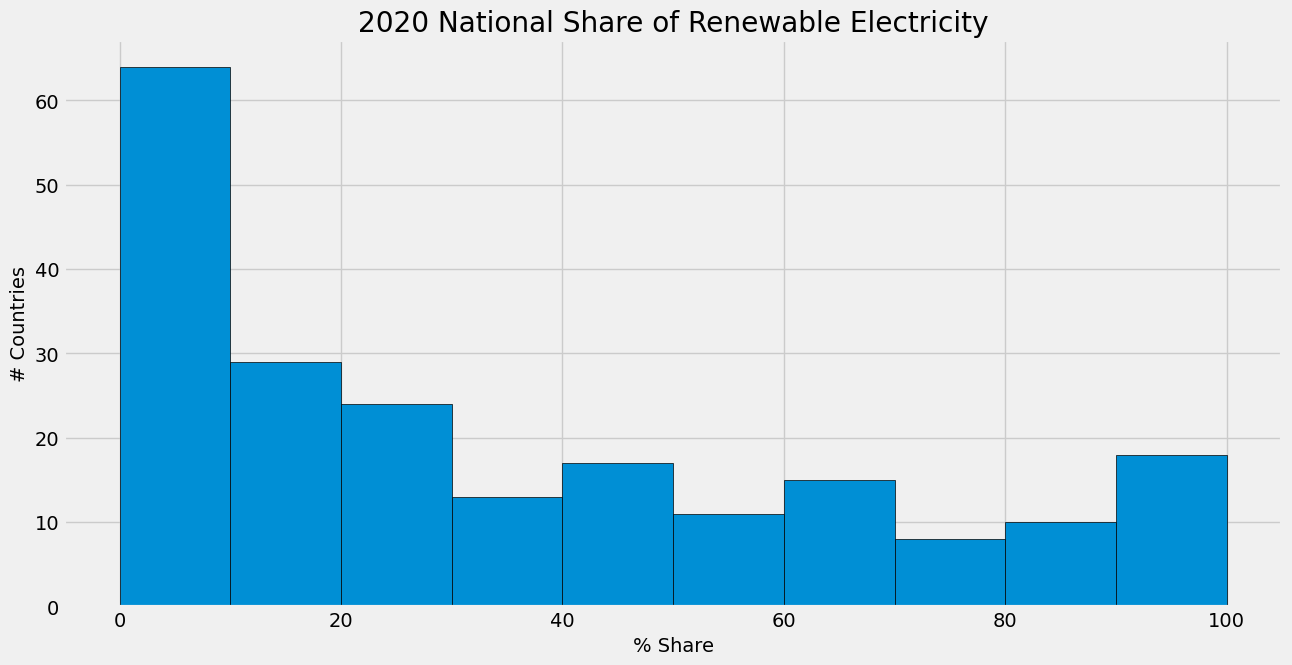

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,7))
plt.title("2020 National Share of Renewable Electricity")
plt.xlabel("% Share", fontsize = 14)
plt.ylabel("# Countries", fontsize = 14)

plt.hist(renew_2020['Share'], 10, edgecolor = 'black')

This histogram is interesting. It shows us that there are a lot of countries with very little renewable electricity generation. As the renewable electricity share increases, the number of countries tends to decrease, except in the final 90-100% bin where there is a surprising tick upwards.

It may be that when a country gets high enough renewable generation, it might make sense to just cut out fossil fuels altogether. This inflection point may be around 80-90% renewable electricity share. I'm curious which countries are in that final bin.

In [17]:
# query to find all countries in the final bin
renew_final=mysql("""
SELECT 
    Entity,
    Code,
    "Renewables (% electricity)" AS Share
FROM renew_share
WHERE
    Year = 2020
AND
    Share >= 90
""")

In [18]:
renew_final.head(20)

,Entity,Code,Share
0,Albania,ALB,100.000
1,Bhutan,BTN,100.000
2,Central African Republic,CAF,100.000
3,Costa Rica,CRI,98.799
4,Democratic Republic of Congo,COD,99.676
5,Eswatini,SWZ,93.939
6,Ethiopia,ETH,99.929
7,Iceland,ISL,100.000
8,Kenya,KEN,92.958
9,Kyrgyzstan,KGZ,92.848


This list of countries is an interesting mix. There are a lot of smaller countries as well as poor and wealthy countries. It kind of makes sense that a small country might be able to get to 90-100% renewable electricity if they happen to have an abundant renewable resource. This would be more difficult for larger countries that need to rely on more than just a single electricity source.

Countries like Albania, Central African Republic, Ethiopia and Bhutan get nearly all their electricity from hydroelectric sources. Other countries like Iceland have huge geothermal energy resources. While other countries like Costa Rica have a mix of hydro, geothermal, wind and biomass resources. We have a good mix of countries that happen to have big renewable resources, or are poorer countries that don't use a lot of electricity to begin with.

If I had access to gdp per capita data on the countries, I'd be interested to see if there was some clustering with renewable electricity share.

In [19]:
wind_cap.head(5)

,Entity,Code,Year,Wind Capacity
0,Africa,NaN,1997,0.0060
1,Africa,NaN,1998,0.0100
2,Africa,NaN,1999,0.0640
3,Africa,NaN,2000,0.1334
4,Africa,NaN,2001,0.1334


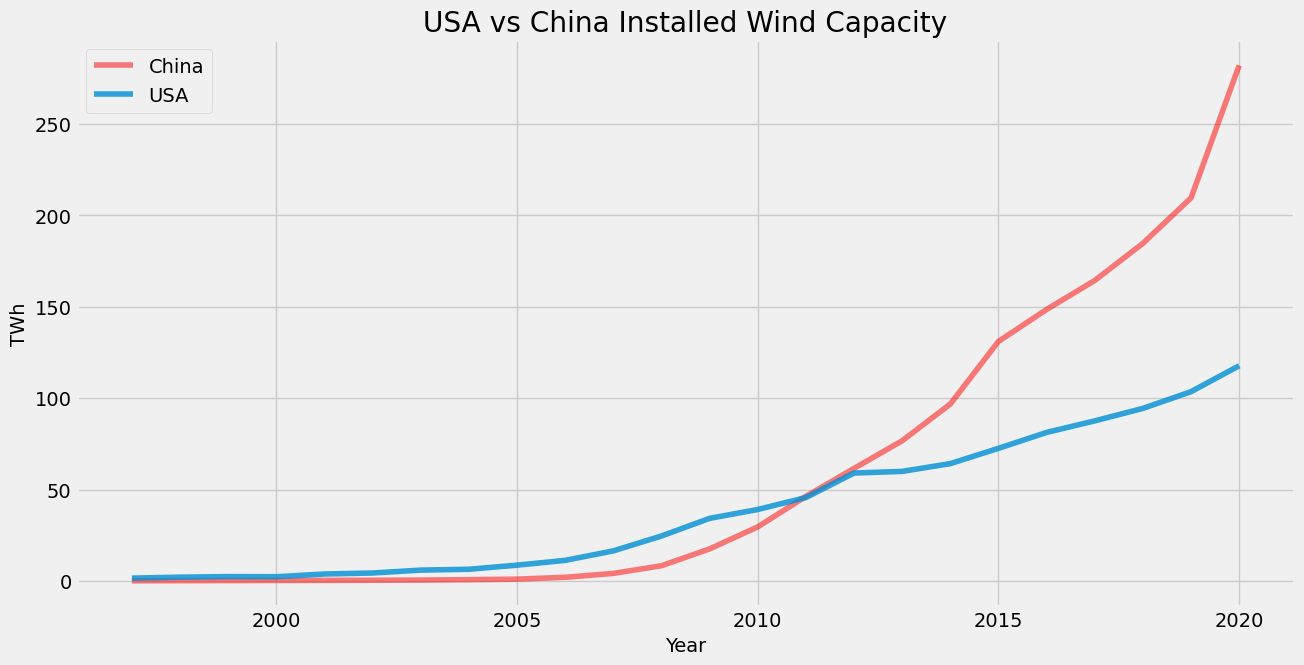

In [20]:
## comparing the growth of wind capacity of China and the USA
wind_cap.rename(columns = {'Wind Capacity':'capacity'}, inplace = True)
usa = wind_cap[wind_cap.Entity == 'United States']
chn = wind_cap[wind_cap.Entity == 'China']

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('USA vs China Installed Wind Capacity')
plt.xlabel("Year", fontsize = 14)
plt.ylabel("TWh", fontsize = 14)

plt.plot(chn.Year, chn.capacity, label = 'China', color = 'r', alpha = 0.5)
plt.plot(usa.Year, usa.capacity, label = 'USA', alpha = 0.8)
plt.legend()

Here we can see that USA wind capacity was larger, up until just past 2010. Then China overtook the USA and continued rapid growth while the USA maintained more linear capacity growth.

I'm interested in seeing how the ratio of China:USA wind capacity changes over time.

In [21]:
combo = pd.merge(usa, chn, on='Year') # create new df with usa & china production values
combo.head(5)

,Entity_x,Code_x,Year,capacity_x,Entity_y,Code_y,capacity_y
0,United States,USA,1997,1.611,China,CHN,0.146
1,United States,USA,1998,2.141,China,CHN,0.200
2,United States,USA,1999,2.445,China,CHN,0.262
3,United States,USA,2000,2.377,China,CHN,0.341
4,United States,USA,2001,3.864,China,CHN,0.383


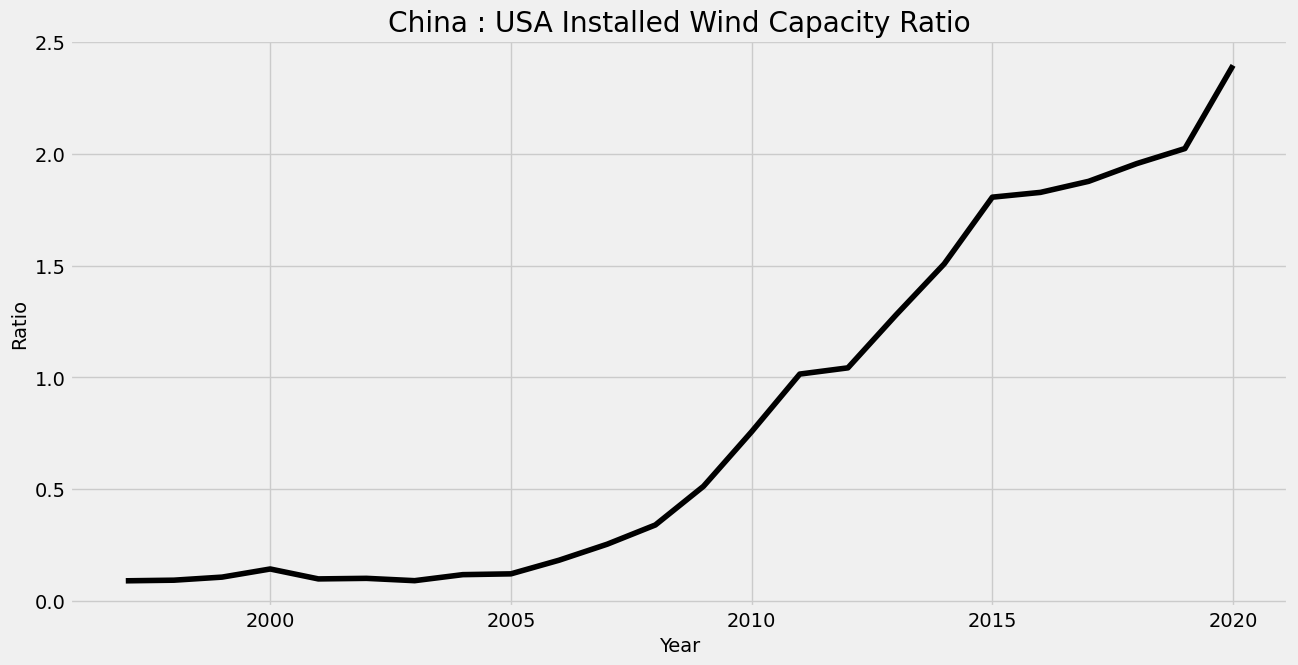

In [22]:
combo['ratio'] = combo['capacity_y']/combo['capacity_x'] 
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('China : USA Installed Wind Capacity Ratio')
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Ratio", fontsize = 14)

plt.plot(combo.Year, combo.ratio, color = 'black')

This graph shows the ratio of China : USA installed wind capacity. You can see China's upward trajectory compared to the USA really starts around 2008. They catch up to the USA around 2011 when the ratio is 1.0 and continue relative growth all the way to 2020 where China has nearly 2.5x the USA's wind capacity.

Let's generate a bar graph to visualize the top 10 countries in 2020 with the most solar energy consumption. 

In [23]:
solar_cons.head(5)

,Entity,Code,Year,Electricity from solar (TWh)
0,Afghanistan,AFG,2000,0.0
1,Afghanistan,AFG,2001,0.0
2,Afghanistan,AFG,2002,0.0
3,Afghanistan,AFG,2003,0.0
4,Afghanistan,AFG,2004,0.0


<BarContainer object of 10 artists>

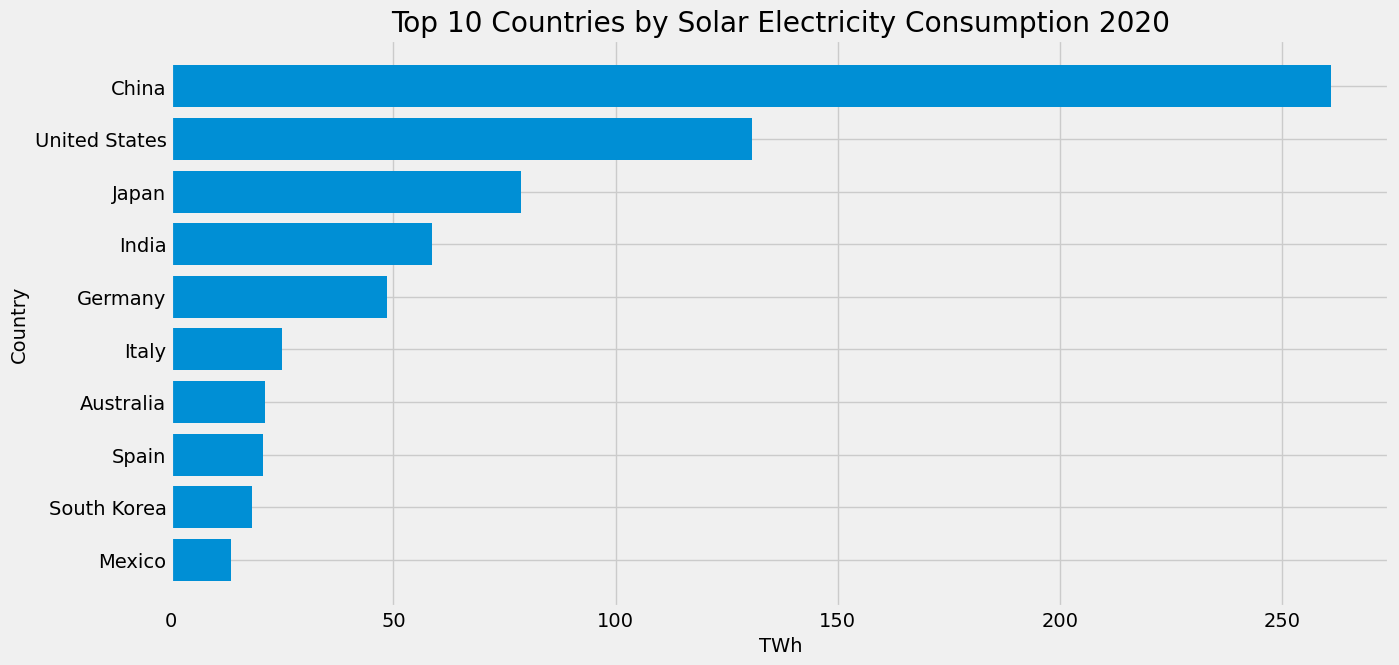

In [24]:
# create new df for 2020 solar consumption data, filter out non-country rows
sc2020 = solar_cons[(solar_cons.Year == 2020) & (solar_cons.Entity != "World") & (solar_cons.Code.notnull())]  
sc2020 = sc2020.rename(columns = {"Electricity from solar (TWh)":"TWh"}) # rename TWh column
# filter top 10 countries
top10 = sc2020.sort_values(by = 'TWh').tail(10)

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('Top 10 Countries by Solar Electricity Consumption 2020')
plt.ylabel("Country", fontsize = 14)
plt.xlabel("TWh", fontsize = 14)

plt.barh(top10.Entity, top10.TWh)

This graph clearly shows how China's consumption of solar electricity dwarfs the rest of the countries. There appears to be a significant drop in consumption over the top 6 countries.

I want to see if wind power and solar power are correlated with each other. My hypothesis is that countries that push for more renewables (outside of hydro) will tend to try and build both PV and wind generation capacity and there should be a positive correlation.

In [25]:
pv_cap.head(5) ## solar power

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001012
1,Africa,NaN,1997,0.003037
2,Africa,NaN,1998,0.005062
3,Africa,NaN,1999,0.008099
4,Africa,NaN,2000,0.010927


In [26]:
wind_cap.head(5) ## wind capacity

,Entity,Code,Year,capacity
0,Africa,NaN,1997,0.0060
1,Africa,NaN,1998,0.0100
2,Africa,NaN,1999,0.0640
3,Africa,NaN,2000,0.1334
4,Africa,NaN,2001,0.1334


equation of trendline: y=1.082553x+(-0.263333)


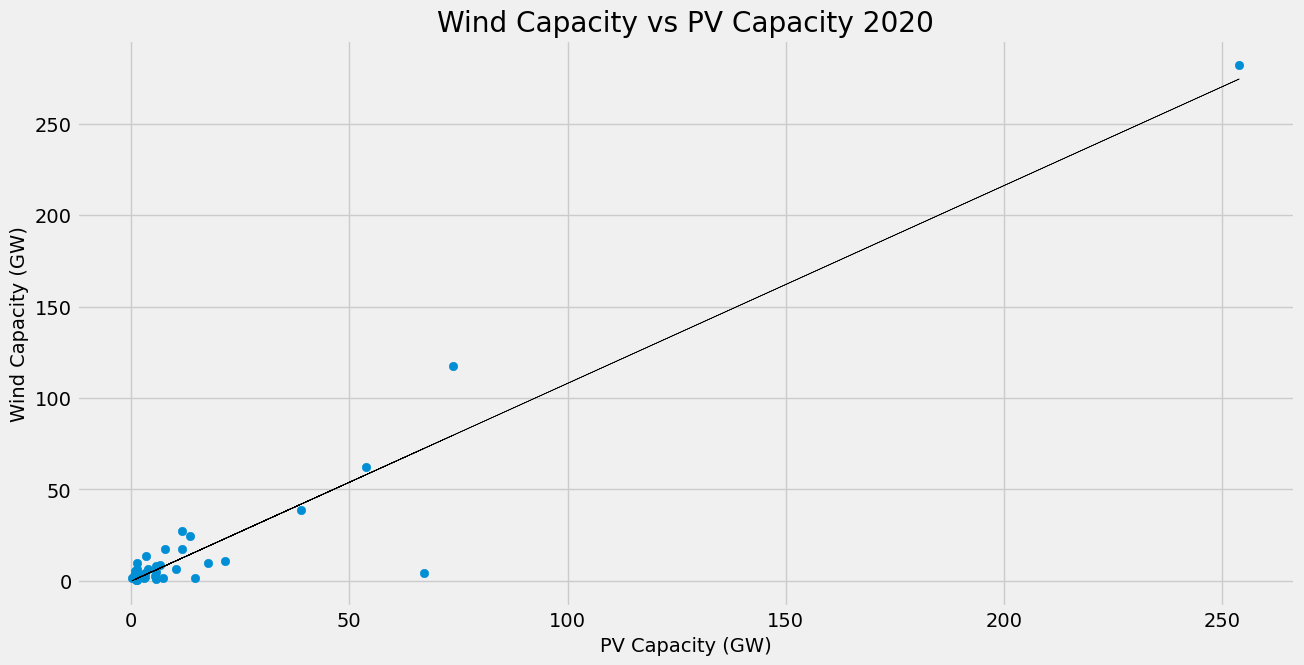

In [27]:
# Filter wind capacity and pv capacity dataframes for countries in 2020
wc2020 = wind_cap[(wind_cap.Year == 2020) & (wind_cap.Entity != "World") & (wind_cap.Code.notnull())]  
pv2020 = pv_cap[(pv_cap.Year == 2020) & (pv_cap.Entity != "World") & (pv_cap.Code.notnull())]  

# join both dataframes together
wcpv = pd.merge(wc2020, pv2020, on='Code') 
wcpv = wcpv.rename(columns = {"Solar Capacity":"pvcap"})

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('Wind Capacity vs PV Capacity 2020')
plt.ylabel("Wind Capacity (GW)", fontsize = 14)
plt.xlabel("PV Capacity (GW)", fontsize = 14)

plt.scatter(wcpv.pvcap, wcpv.capacity)

# add trendline:
z = np.polyfit(wcpv.pvcap, wcpv.capacity, 1)
p = np.poly1d(z)
plt.plot(wcpv.pvcap, p(wcpv.pvcap), linewidth = 0.5, color = 'black')

print("equation of trendline: y=%.6fx+(%.6f)"%(z[0],z[1]))

There does appear to be a positive correlation, as suspected with a slope of almost 1, implying that on average there is a GW of wind capacity installed for every GW of PV capacity installed.

That outlier point in the top right is China and it's so far out that it's difficult to see details with the other countries. Let's try replotting everything without China.

equation of trendline: y=0.926079x+(1.317177)


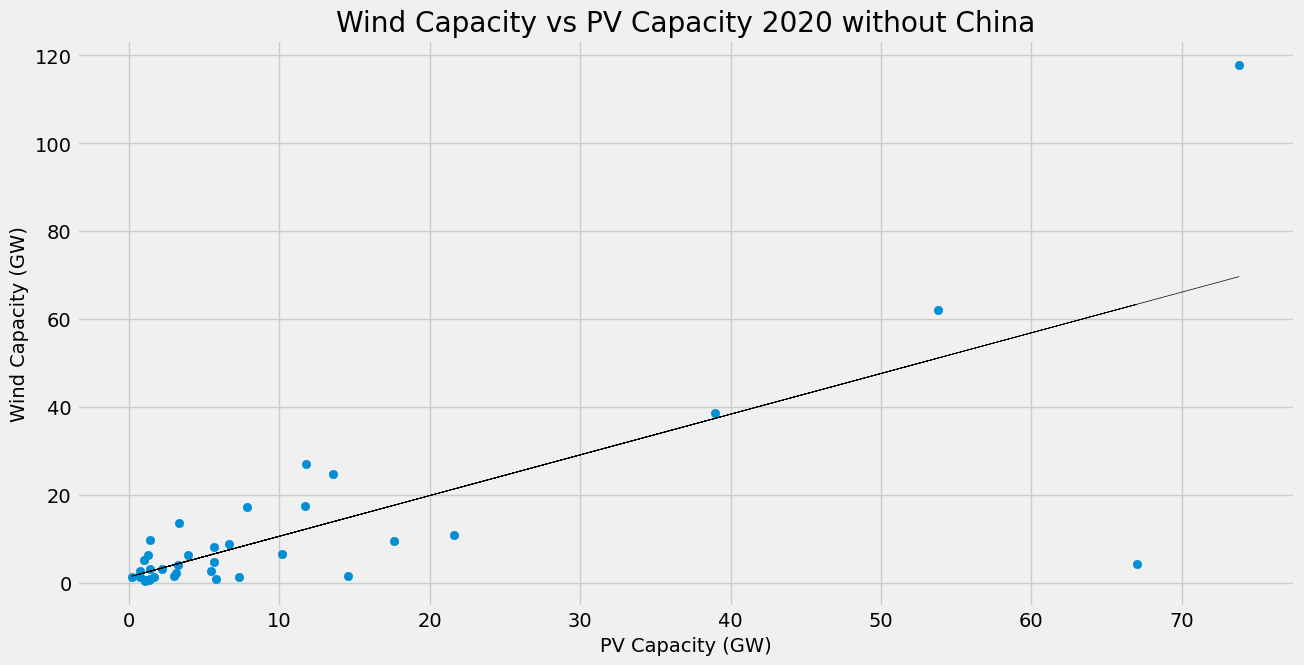

In [28]:
# filter out China
wcpv2 = wcpv[(wcpv.Code != 'CHN')]

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('Wind Capacity vs PV Capacity 2020 without China')
plt.ylabel("Wind Capacity (GW)", fontsize = 14)
plt.xlabel("PV Capacity (GW)", fontsize = 14)

plt.scatter(wcpv2.pvcap, wcpv2.capacity)

# add trendline:
z = np.polyfit(wcpv2.pvcap, wcpv2.capacity, 1)
p = np.poly1d(z)
plt.plot(wcpv2.pvcap, p(wcpv2.pvcap), linewidth = 0.5, color = 'black')

print("equation of trendline: y=%.6fx+(%.6f)"%(z[0],z[1]))

Filtering out China allows us to zoom in on the remaining countries and the positive correlation survives with a trendline slope of 0.926, so still close to 1.

That outlier point in the bottom right with high PV capacity and low wind capacity is Japan. Japan had a huge surge in PV installation following the Fukushima disaster in 2011, but this was not matched with a big surge in wind generation. I speculate this is because PV is easier and faster to deploy with smaller distributed systems either retrofitted on rooftops or built on unused land. Wind generation is more tricky, being more site specific, with longer lead times and needing larger scales to be economical.

There is a push for Japan to build more offshore wind over the next few decades. They are targeting 45 GW of wind capacity by 2040. Offshore wind is very capital intensive and takes a long time to build. I'm not sure if Japan will migrate towards the global trendline over the next few decades. The offshore wind projects will help, but PV installation may continue to grow and maintain its lead.

In [29]:
wcpv[(wcpv.Code == 'JPN')]

,Entity_x,Code,Year_x,capacity,Entity_y,Year_y,pvcap
16,Japan,JPN,2020,4.206,Japan,2020,67.0


For our pie chart, let's try and zoom out and see what the worldwide renewable energy mix looks like. Renewable Energy Components:

- Biomass
- Hydro
- Geothermal
- Solar
- Wind

In [30]:
renew_cons.head(5)

,Entity,Code,Year,Wind Generation - TWh,Solar Generation - TWh,Geo Biomass Other - TWh,Hydro Generation - TWh
0,Africa,NaN,1965,0.0,0.0,0.0,13.905635
1,Africa,NaN,1966,0.0,0.0,0.0,15.510004
2,Africa,NaN,1967,0.0,0.0,0.0,16.190636
3,Africa,NaN,1968,0.0,0.0,0.0,18.938341
4,Africa,NaN,1969,0.0,0.0,0.0,22.100890


In [31]:
# Filter renewable consumption dataframe for the World record in 2020
world = renew_cons[(renew_cons.Year == 2020) & (renew_cons.Entity == 'World')]
world.head(5)

,Entity,Code,Year,Wind Generation - TWh,Solar Generation - TWh,Geo Biomass Other - TWh,Hydro Generation - TWh
5002,World,OWID_WRL,2020,1591.213512,855.72469,700.068651,4296.802045


/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_6878/722357148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world.drop(['Entity', 'Code', 'Year'], axis=1, inplace=True)


([<matplotlib.patches.Wedge at 0x7f9c20338a30>,
 [Text(0.8611389905757068, 0.6844265036585396, 'Wind'),
  Text(-0.14638066382321197, 1.090216813876339, 'Solar'),
  Text(-0.781448844739685, 0.7741690403619947, 'Geo/Bio/Other'),
  Text(-0.2642825577709614, -1.067780281545805, 'Hydro')],
 [Text(0.4697121766776582, 0.3733235474501125, '21.4%'),
  Text(-0.07984399844902469, 0.5946637166598212, '11.5%'),
  Text(-0.4262448244034645, 0.42227402201563347, '9.4%'),
  Text(-0.14415412242052436, -0.5824256081158936, '57.7%')])

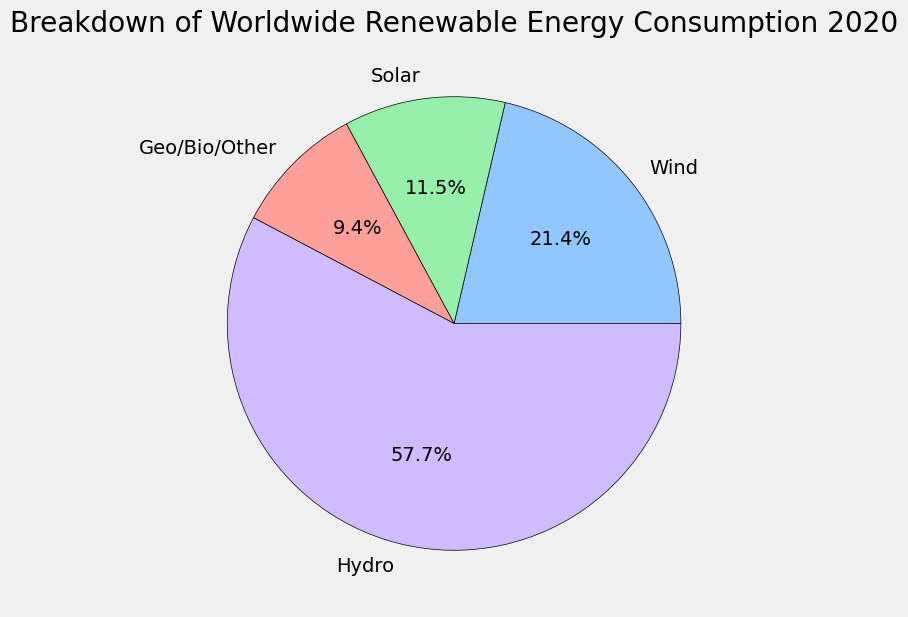

In [32]:
# Drop all columns not containing consumption data so we can create a pie chart
world.drop(['Entity', 'Code', 'Year'], axis=1, inplace=True)

plt.style.use("seaborn-pastel")
plt.figure(figsize = (7,7))
plt.title('Breakdown of Worldwide Renewable Energy Consumption 2020')

plt.pie(world.iloc[0], labels = ['Wind', 'Solar', 'Geo/Bio/Other', 'Hydro'], autopct='%1.1f%%', wedgeprops = {'edgecolor':'black'})

Here we can see that Hydropower represents the largest source of renewable energy worldwide, followed by Wind then Solar. Geothermal, Biomass and other renewables make up the last category.

## Shared energy

### solar electricity share

In [33]:
solar_share_nrg.head(5)

,Entity,Code,Year,Solar (% sub energy)
0,Africa,NaN,1965,0.0
1,Africa,NaN,1966,0.0
2,Africa,NaN,1967,0.0
3,Africa,NaN,1968,0.0
4,Africa,NaN,1969,0.0


In [34]:
solar_share_nrg.shape

(4835, 4)

There are 4,835 rows and 4 columns in the dataset

<BarContainer object of 10 artists>

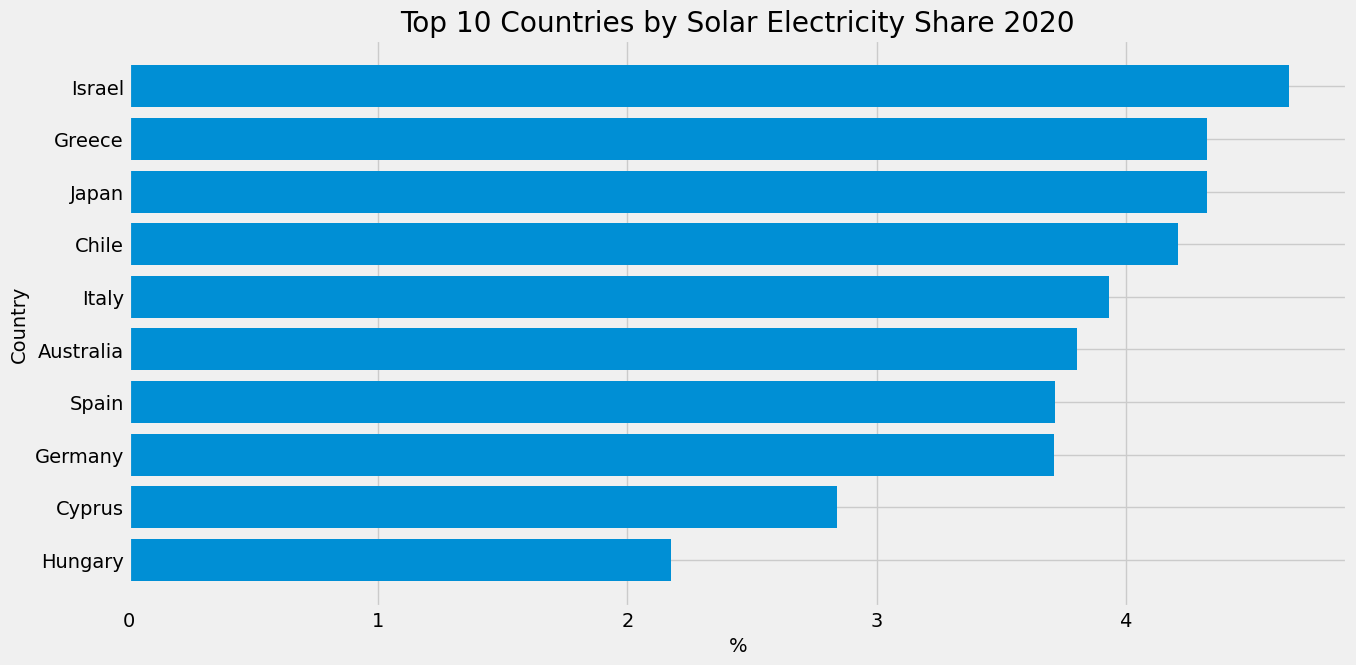

In [50]:
# create new df for 2020 solar consumption data, filter out non-country rows
sc2020 = solar_share_nrg[(solar_share_nrg.Year == 2020) & (solar_share_nrg.Entity != "World") & (solar_share_nrg.Code.notnull())]  
sc2020 = sc2020.rename(columns = {"Solar (% sub energy)":"Solar"}) # rename TWh column
# filter top 10 countries
top10 = sc2020.sort_values(by = 'Solar').tail(10)

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('Top 10 Countries by Solar Electricity Share 2020')
plt.ylabel("Country", fontsize = 14)
plt.xlabel("%", fontsize = 14)

plt.barh(top10.Entity, top10.Solar)

Israel produce the highest solar energy followed by greece and japan in 2020

## Hydro share

In [40]:
hydro_share_nrg.shape

(4835, 4)

In [41]:
hydro_share_nrg.head(5)

,Entity,Code,Year,Hydro (% sub energy)
0,Africa,NaN,1965,5.526
1,Africa,NaN,1966,5.862
2,Africa,NaN,1967,6.069
3,Africa,NaN,1968,6.730
4,Africa,NaN,1969,7.669


<BarContainer object of 10 artists>

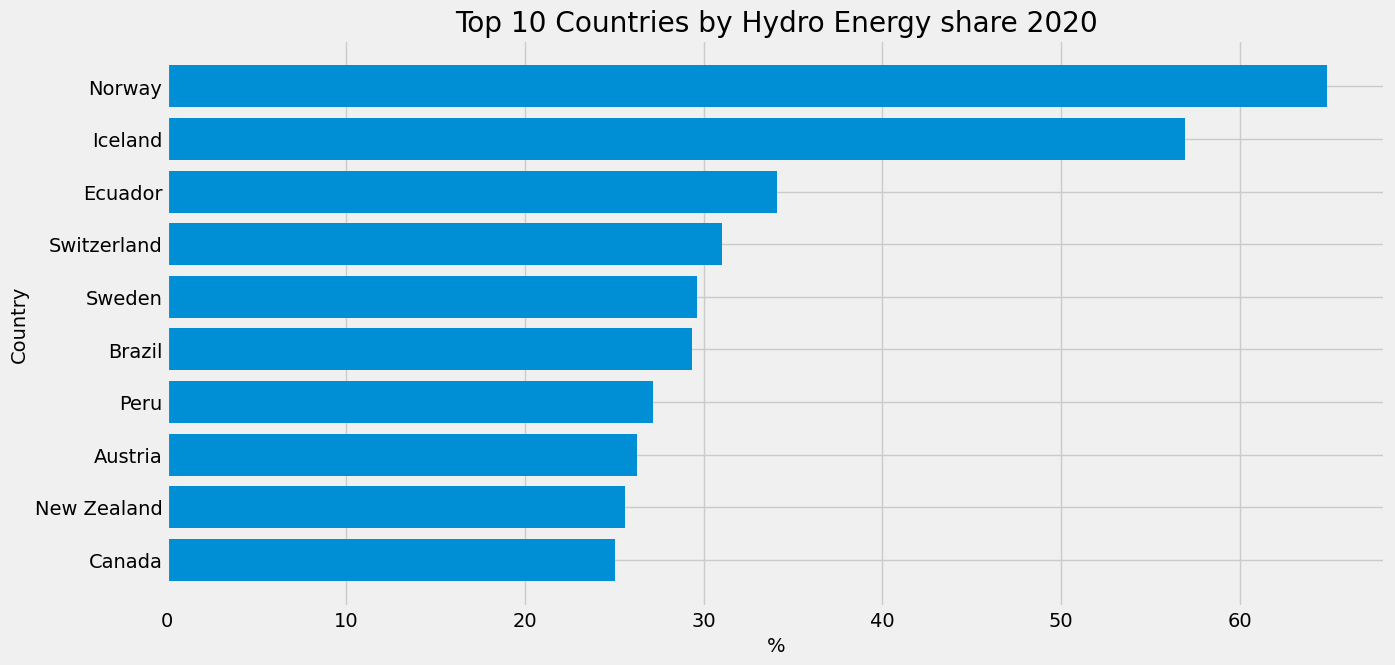

In [51]:
# create new df for 2020 solar consumption data, filter out non-country rows
hydro2020 = hydro_share_nrg[(hydro_share_nrg.Year == 2020) & (hydro_share_nrg.Entity != "World") & (hydro_share_nrg.Code.notnull())]  
hydro2020 = hydro2020.rename(columns = {"Hydro (% sub energy)":"Hydro"}) # rename TWh column
# filter top 10 countries
top10 = hydro2020.sort_values(by = 'Hydro').tail(10)

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('Top 10 Countries by Hydro Energy share 2020')
plt.ylabel("Country", fontsize = 14)
plt.xlabel("%", fontsize = 14)

plt.barh(top10.Entity, top10.Hydro)

### wind energy share

In [48]:
wind_share.shape

(4835, 4)

In [49]:
wind_share.head(5)

,Entity,Code,Year,Wind (% sub energy)
0,Africa,NaN,1965,0.0
1,Africa,NaN,1966,0.0
2,Africa,NaN,1967,0.0
3,Africa,NaN,1968,0.0
4,Africa,NaN,1969,0.0


<BarContainer object of 10 artists>

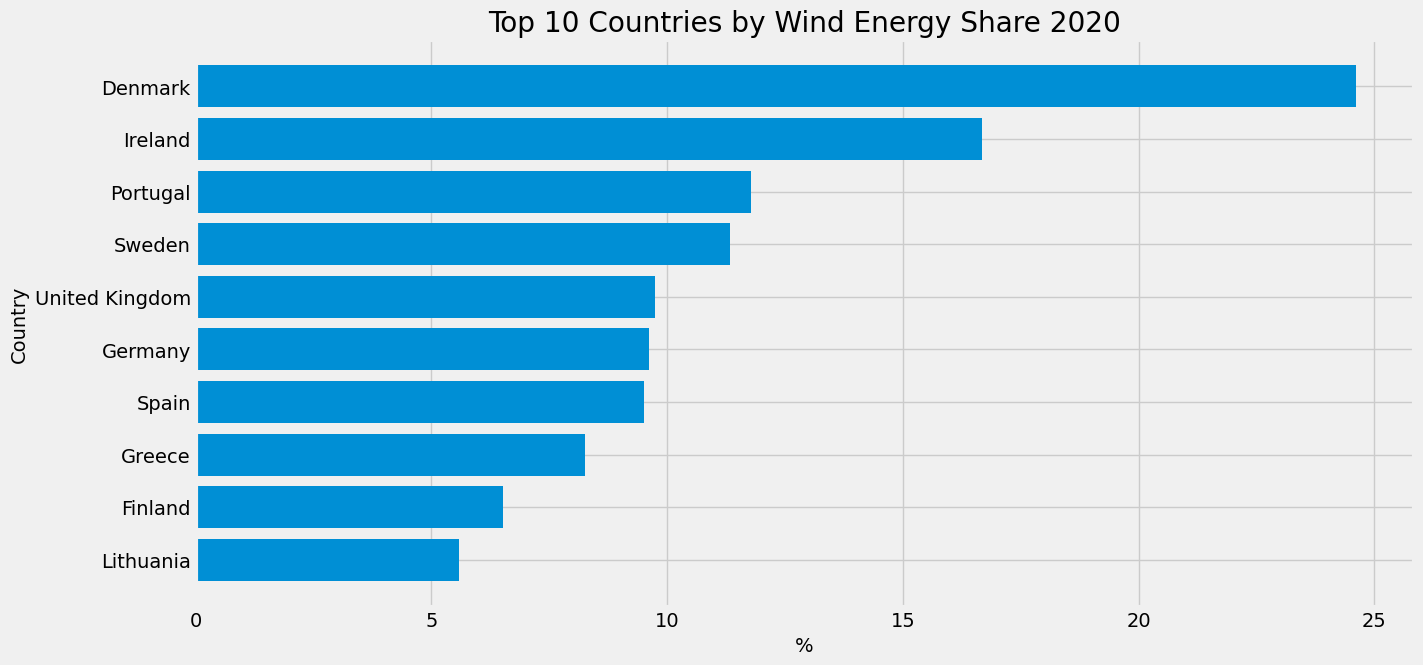

In [53]:
# create new df for 2020 solar consumption data, filter out non-country rows
wind2020 = wind_share[(wind_share.Year == 2020) & (wind_share.Entity != "World") & (wind_share.Code.notnull())]  
wind2020 = wind2020.rename(columns = {"Wind (% sub energy)":"Wind"}) # rename TWh column
# filter top 10 countries
top10 = wind2020.sort_values(by = 'Wind').tail(10)

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('Top 10 Countries by Wind Energy Share 2020')
plt.ylabel("Country", fontsize = 14)
plt.xlabel("%", fontsize = 14)

plt.barh(top10.Entity, top10.Wind)

### Renewable share energy

In [55]:
renew_share_nrg.head(5)

,Entity,Code,Year,Renewables (% sub energy)
0,Africa,NaN,1965,5.526
1,Africa,NaN,1966,5.862
2,Africa,NaN,1967,6.069
3,Africa,NaN,1968,6.730
4,Africa,NaN,1969,7.669


<BarContainer object of 10 artists>

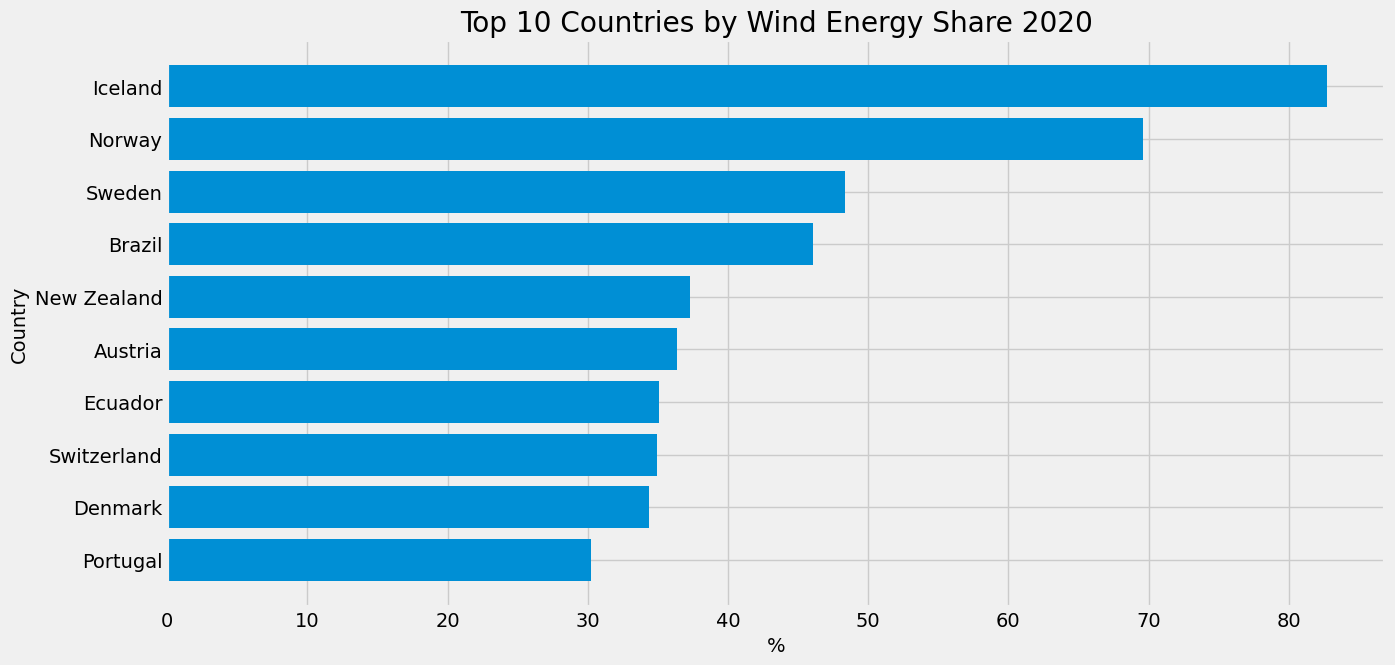

In [62]:
# create new df for 2020 solar consumption data, filter out non-country rows
renew2020 = renew_share_nrg[(renew_share_nrg.Year == 2020) & (renew_share_nrg.Entity != "World") & (renew_share_nrg.Code.notnull())]  
renew2020 = renew2020.rename(columns = {"Renewables (% sub energy)":"Renewable"}) # rename TWh column
# filter top 10 countries
top10 = renew2020.sort_values(by = 'Renewable').tail(10)

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('Top 10 Countries by Wind Energy Share 2020')
plt.ylabel("Country", fontsize = 14)
plt.xlabel("%", fontsize = 14)

plt.barh(top10.Entity, top10.Renewable)

## What is the coverage of the German electricity consumption by wind and solar energy since 2015?

In [65]:
renew_cons.head(5)

,Entity,Code,Year,Wind Generation - TWh,Solar Generation - TWh,Geo Biomass Other - TWh,Hydro Generation - TWh
0,Africa,NaN,1965,0.0,0.0,0.0,13.905635
1,Africa,NaN,1966,0.0,0.0,0.0,15.510004
2,Africa,NaN,1967,0.0,0.0,0.0,16.190636
3,Africa,NaN,1968,0.0,0.0,0.0,18.938341
4,Africa,NaN,1969,0.0,0.0,0.0,22.100890


In [66]:
renew2015up = renew_cons[(renew_cons.Year >=2015) & (renew_cons.Entity == "Germany") & (renew_cons.Code.notnull())] 
renew2015up.head(10)

,Entity,Code,Year,Wind Generation - TWh,Solar Generation - TWh,Geo Biomass Other - TWh,Hydro Generation - TWh
1639,Germany,DEU,2015,80.624,38.726,50.459000,18.977159
1640,Germany,DEU,2016,79.924,38.098,51.103511,20.546344
1641,Germany,DEU,2017,105.693,39.401,51.080455,20.150000
1642,Germany,DEU,2018,109.951,45.784,51.078522,17.975000
1643,Germany,DEU,2019,125.894,46.392,50.416629,20.192320
1644,Germany,DEU,2020,130.965,50.600,50.815590,18.633000


In [67]:
## comparing the growth of wind capacity of China and the USA
renew2015up.rename(columns = {'Wind Generation - TWh':'Wind','Solar Generation - TWh':'Solar'}, inplace = True)
renew2015up

/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_6878/1237936686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renew2015up.rename(columns = {'Wind Generation - TWh':'Wind','Solar Generation - TWh':'Solar'}, inplace = True)


,Entity,Code,Year,Wind,Solar,Geo Biomass Other - TWh,Hydro Generation - TWh
1639,Germany,DEU,2015,80.624,38.726,50.459000,18.977159
1640,Germany,DEU,2016,79.924,38.098,51.103511,20.546344
1641,Germany,DEU,2017,105.693,39.401,51.080455,20.150000
1642,Germany,DEU,2018,109.951,45.784,51.078522,17.975000
1643,Germany,DEU,2019,125.894,46.392,50.416629,20.192320
1644,Germany,DEU,2020,130.965,50.600,50.815590,18.633000


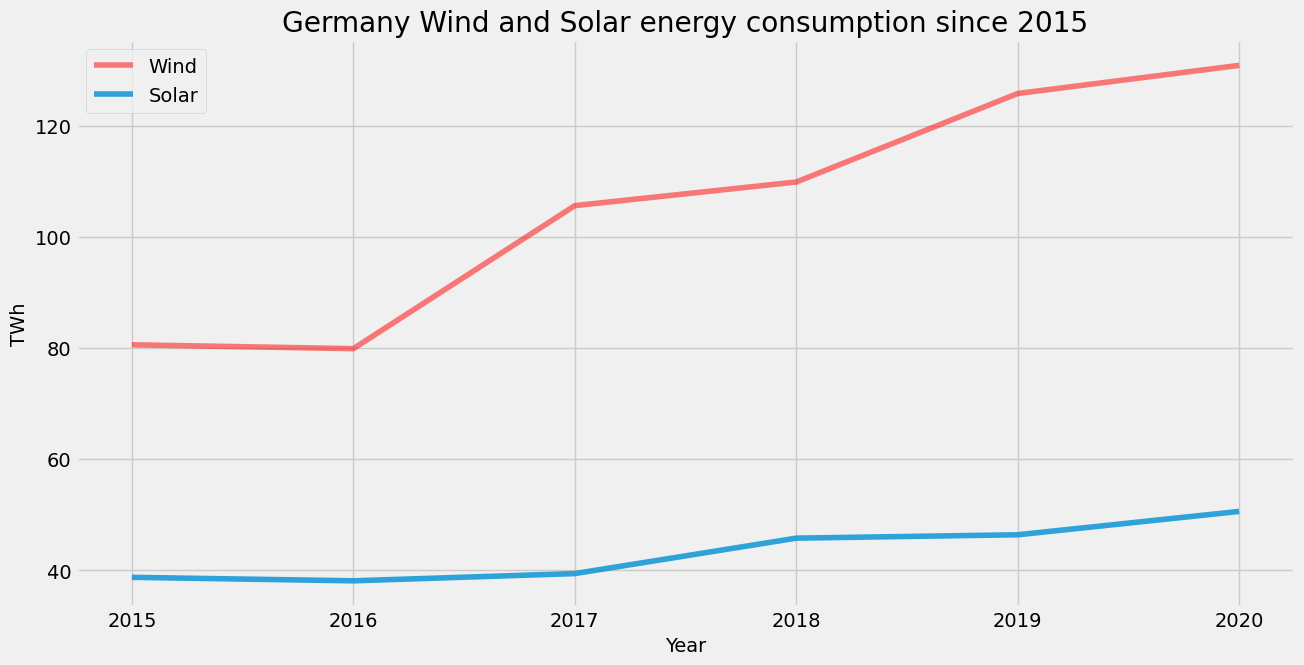

In [68]:

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('Germany Wind and Solar energy consumption since 2015')
plt.xlabel("Year", fontsize = 14)
plt.ylabel("TWh", fontsize = 14)

plt.plot(renew2015up.Year, renew2015up.Wind, label = 'Wind', color = 'r', alpha = 0.5)
plt.plot(renew2015up.Year, renew2015up.Solar, label = 'Solar', alpha = 0.8)
plt.legend()

## Calculate grid load coverage: Calculate the percentage of electricity consumption covered by PV and wind energy for each year. Determine how many hours in each year PV and wind contributed to 25%, 50%, 75%, and 100% coverage of the grid load.


In [71]:
# Calculate the total grid load (sum of PV and Wind energy)
renew2015up['Grid_Load'] = renew2015up['Wind'] + renew2015up['Solar']
# Calculate the percentages of coverage for each year
coverage_percentages = [25, 50, 75, 100]
for percentage in coverage_percentages:
    # Calculate the threshold for the specified percentage
    threshold = percentage / 100 * renew2015up['Grid_Load']
    
    # Create a new column indicating whether coverage meets the threshold
    renew2015up[f'Coverage_{percentage}%'] = renew2015up['Solar'] + renew2015up['Wind'] >= threshold

/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_6878/4065845994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renew2015up['Grid_Load'] = renew2015up['Wind'] + renew2015up['Solar']
/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_6878/4065845994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renew2015up[f'Coverage_{percentage}%'] = renew2015up['Solar'] + renew2015up['Wind'] >= threshold
/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_6878/4065845994.py:10: SettingW

In [72]:
renew2015up

,Entity,Code,Year,Wind,Solar,Geo Biomass Other - TWh,Hydro Generation - TWh,Grid_Load,Coverage_25%,Coverage_50%,Coverage_75%,Coverage_100%
1639,Germany,DEU,2015,80.624,38.726,50.459000,18.977159,119.350,True,True,True,True
1640,Germany,DEU,2016,79.924,38.098,51.103511,20.546344,118.022,True,True,True,True
1641,Germany,DEU,2017,105.693,39.401,51.080455,20.150000,145.094,True,True,True,True
1642,Germany,DEU,2018,109.951,45.784,51.078522,17.975000,155.735,True,True,True,True
1643,Germany,DEU,2019,125.894,46.392,50.416629,20.192320,172.286,True,True,True,True
1644,Germany,DEU,2020,130.965,50.600,50.815590,18.633000,181.565,True,True,True,True


In [73]:
# Determine how many hours each year met the specified coverage percentages
for year in renew2015up['Year']:
    print(f"Year {year}:")
    for percentage in coverage_percentages:
        hours_covered = renew2015up[renew2015up['Year'] == year][f'Coverage_{percentage}%'].sum()
        print(f"{percentage}% coverage: {hours_covered} hours")

Year 2015:
25% coverage: 1 hours
50% coverage: 1 hours
75% coverage: 1 hours
100% coverage: 1 hours
Year 2016:
25% coverage: 1 hours
50% coverage: 1 hours
75% coverage: 1 hours
100% coverage: 1 hours
Year 2017:
25% coverage: 1 hours
50% coverage: 1 hours
75% coverage: 1 hours
100% coverage: 1 hours
Year 2018:
25% coverage: 1 hours
50% coverage: 1 hours
75% coverage: 1 hours
100% coverage: 1 hours
Year 2019:
25% coverage: 1 hours
50% coverage: 1 hours
75% coverage: 1 hours
100% coverage: 1 hours
Year 2020:
25% coverage: 1 hours
50% coverage: 1 hours
75% coverage: 1 hours
100% coverage: 1 hours


This code will calculate the total grid load for each year, determine whether PV and wind energy met the specified coverage percentages (25%, 50%, 75%, and 100%), and then count the number of hours each year that met those percentages.

/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_6878/1305115124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renew2015up['Renewable_Contribution'] = (renew2015up['Solar'] + renew2015up['Wind']) / renew2015up['Grid_Load'] * 100


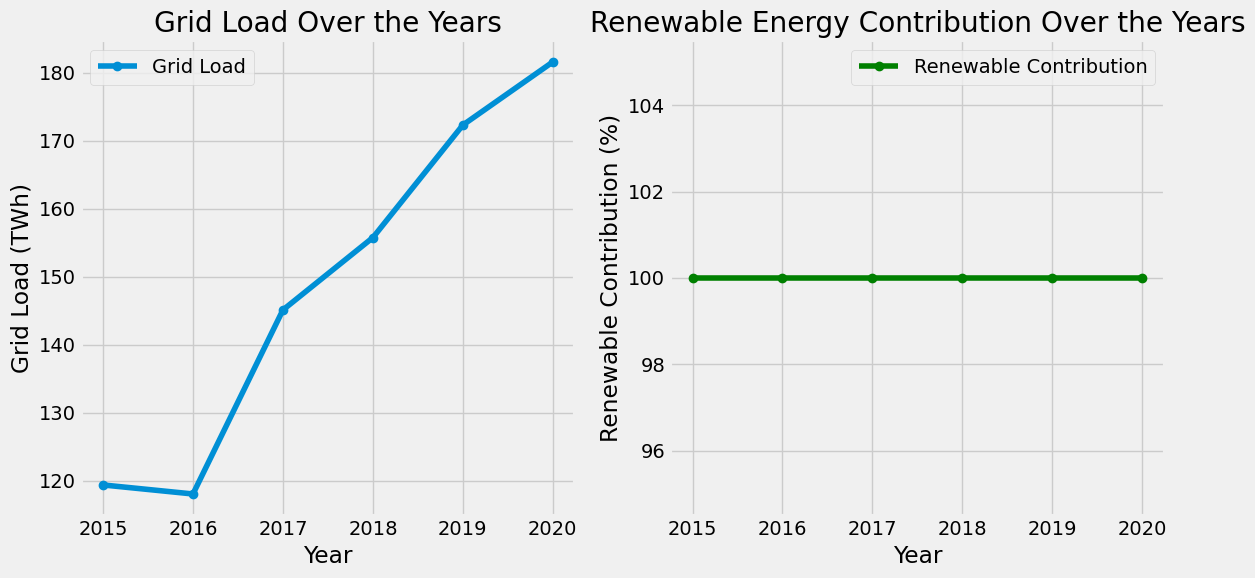

In [77]:
# Calculate the percentage of renewable energy contribution
renew2015up['Renewable_Contribution'] = (renew2015up['Solar'] + renew2015up['Wind']) / renew2015up['Grid_Load'] * 100

# Plot trends in grid load coverage and renewable energy contribution over the years
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(renew2015up['Year'], renew2015up['Grid_Load'], marker='o', linestyle='-', label='Grid Load')
plt.title('Grid Load Over the Years')
plt.xlabel('Year')
plt.ylabel('Grid Load (TWh)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(renew2015up['Year'], renew2015up['Renewable_Contribution'], marker='o', linestyle='-', color='green', label='Renewable Contribution')
plt.title('Renewable Energy Contribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Renewable Contribution (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [78]:
renew2015up

,Entity,Code,Year,Wind,Solar,Geo Biomass Other - TWh,Hydro Generation - TWh,Grid_Load,Coverage_25%,Coverage_50%,Coverage_75%,Coverage_100%,Renewable_Contribution
1639,Germany,DEU,2015,80.624,38.726,50.459000,18.977159,119.350,True,True,True,True,100.0
1640,Germany,DEU,2016,79.924,38.098,51.103511,20.546344,118.022,True,True,True,True,100.0
1641,Germany,DEU,2017,105.693,39.401,51.080455,20.150000,145.094,True,True,True,True,100.0
1642,Germany,DEU,2018,109.951,45.784,51.078522,17.975000,155.735,True,True,True,True,100.0
1643,Germany,DEU,2019,125.894,46.392,50.416629,20.192320,172.286,True,True,True,True,100.0
1644,Germany,DEU,2020,130.965,50.600,50.815590,18.633000,181.565,True,True,True,True,100.0


Based on the provided data, it appears that renewable energy (Wind and Solar) has consistently covered 100% of the grid load for Germany in each of the years from 2015 to 2020. This means that renewable energy sources alone have provided enough electricity to meet the entire grid load for Germany during these years.

Please note that this analysis is based on the provided data, and it's important to verify the accuracy of the data sources and calculations in a real-world scenario. Additionally, this analysis does not take into account other energy sources or factors that may influence the energy mix in Germany.

It appears that the grid load in Germany was steadily increasing during the years 2015 and 2016, followed by a more rapid increase from 2017 to 2020. This change in the rate of increase suggests a potential acceleration in electricity consumption and demand during the later years.

The shift to a more rapid increase in grid load could be influenced by a variety of factors, including economic growth, industrial development, and changes in energy consumption patterns. It's essential for energy planners and policymakers to closely monitor these trends to ensure that energy production and infrastructure can meet the increasing demand while also considering sustainable and renewable energy sources to address both environmental and energy security concerns.

##  Is there a correlation between PV and wind additions and different grid load coverage levels, is the relationship linear and, if not, how can it be described? ?

In [81]:
renew2015upCorr= renew_cons[(renew_cons.Entity == "Germany") & (renew_cons.Code.notnull())]
renew2015upCorr.head(5)

,Entity,Code,Year,Wind Generation - TWh,Solar Generation - TWh,Geo Biomass Other - TWh,Hydro Generation - TWh
1589,Germany,DEU,1965,0.0,0.0,0.0,16.212209
1590,Germany,DEU,1966,0.0,0.0,0.0,17.533998
1591,Germany,DEU,1967,0.0,0.0,0.0,16.652312
1592,Germany,DEU,1968,0.0,0.0,0.0,16.898991
1593,Germany,DEU,1969,0.0,0.0,0.0,13.713478


In [82]:
renew2015upCorr.rename(columns = {'Wind Generation - TWh':'Wind','Solar Generation - TWh':'Solar'}, inplace = True)
renew2015upCorr.head(5)

/var/folders/r7/xbd75fl13wvf24ktcp53cf1h0000gn/T/ipykernel_6878/1753805454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renew2015upCorr.rename(columns = {'Wind Generation - TWh':'Wind','Solar Generation - TWh':'Solar'}, inplace = True)


,Entity,Code,Year,Wind,Solar,Geo Biomass Other - TWh,Hydro Generation - TWh
1589,Germany,DEU,1965,0.0,0.0,0.0,16.212209
1590,Germany,DEU,1966,0.0,0.0,0.0,17.533998
1591,Germany,DEU,1967,0.0,0.0,0.0,16.652312
1592,Germany,DEU,1968,0.0,0.0,0.0,16.898991
1593,Germany,DEU,1969,0.0,0.0,0.0,13.713478


equation of trendline: y=0.405410x+(-1.206159)


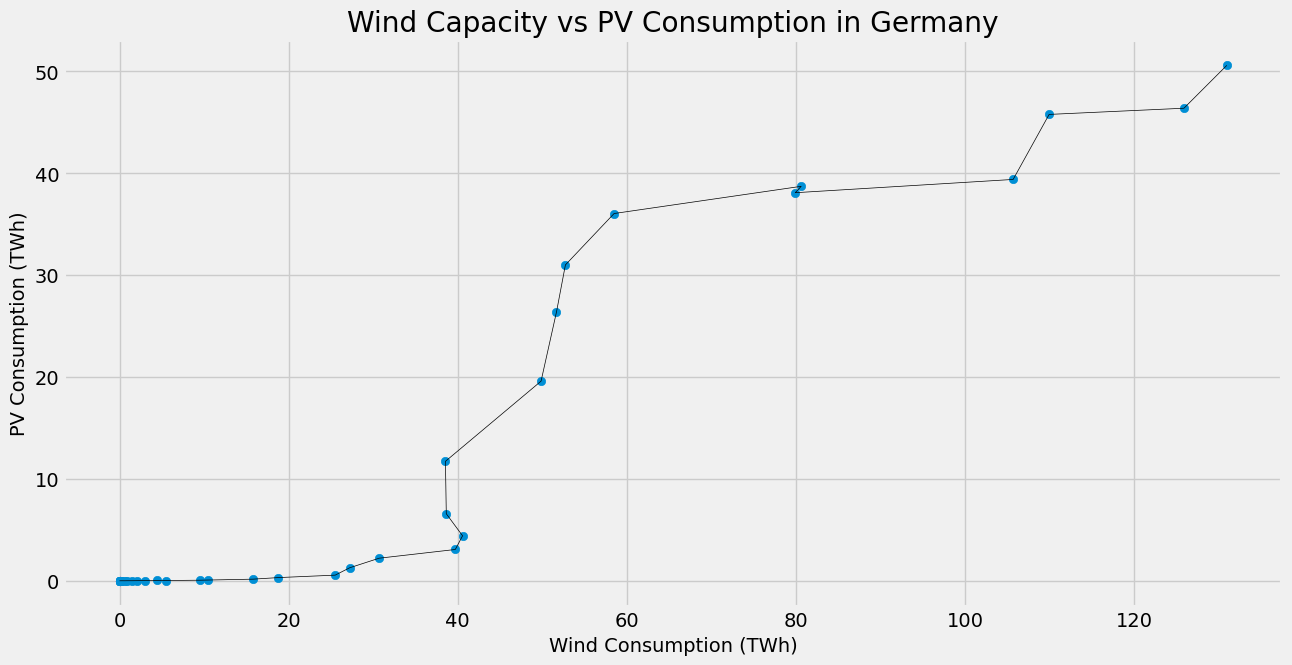

In [86]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,7))
plt.title('Wind Capacity vs PV Consumption in Germany')
plt.ylabel("PV Consumption (TWh)", fontsize = 14)
plt.xlabel("Wind Consumption (TWh)", fontsize = 14)

plt.scatter(renew2015upCorr.Wind, renew2015upCorr.Solar)

# add trendline:
z = np.polyfit(renew2015upCorr.Wind, renew2015upCorr.Solar, 1)
p = np.poly1d(z)
plt.plot(renew2015upCorr.Wind, renew2015upCorr.Solar, linewidth = 0.5, color = 'black')

print("equation of trendline: y=%.6fx+(%.6f)"%(z[0],z[1]))

In [84]:
## calculate the correlation coefficient
renew2015upCorr['Solar'].corr(renew2015upCorr['Wind'].astype(int))

0.9515375437955266

A correlation coefficient of 0.9515 between PV (Photovoltaic) and wind consumption indicates a strong positive linear correlation between these two variables. Here's what this means:

A positive correlation means that as one variable (PV consumption) increases, the other variable (wind consumption) also tends to increase. In this case, when PV consumption increases, wind consumption tends to increase as well.

However, it's important to note that even though there is a strong positive correlation, the scatter plot of PV versus wind consumption is increasing but not linearly. This suggests that while there is a strong overall positive relationship, there may be some curvature or nonlinear patterns in the data.

To interpret this:

- Nonlinear Patterns: The fact that the scatter plot shows an increasing trend that is not strictly linear suggests that there may be other factors at play. It's possible that the relationship between PV and wind consumption is influenced by nonlinear factors or interactions that are not captured by a simple linear model.

- Further Analysis: To better understand this relationship, you may want to explore nonlinear regression models or more advanced statistical techniques that can capture and describe the nonlinear patterns in the data. These models can provide a more accurate representation of the relationship between PV and wind consumption.